# Imports

In [144]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import warnings

from common.baseclasses import AWA
from NearFieldOptics import Materials as M
from NearFieldOptics.Materials import TransferMatrixMedia as TMM
from NearFieldOptics import TipModels as T
warnings.simplefilter("ignore")

# ArrayWithAxes (AWA)
AWAs are incredibly useful constructs if you're going to be intensively using NearFieldOptics. They are classes which allow the programmer to attach a set of axes to an array which make them very useful for representing functions. Below is a very simple example of using AWAs but, as the number of axes increases, so does the utility of using AWAs...

## Plotting
Say that I want to plot an array as a function of another array. Maybe I have 2 arrays which are both functions of a common array that I want to sum...

### Working without AWAs

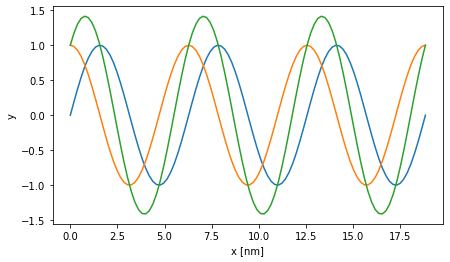

In [25]:
x = np.linspace(0,6*np.pi,100)
y1 = np.sin(x)
y2 = np.cos(x)
y_sum = y1+y2

plt.figure(figsize=(7,4))
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y_sum)
plt.xlabel("x [nm]")
plt.ylabel("y");

### Working with AWAs

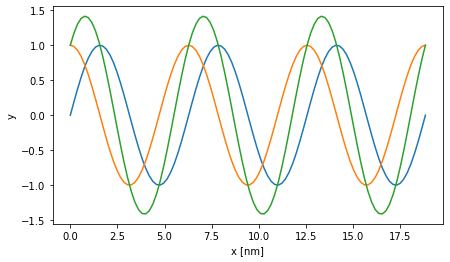

In [26]:
x = np.linspace(0,6*np.pi,100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize=(7,4))
y1_AWA = AWA(y1, axes=[x], axis_names=["x [nm]"])
y2_AWA = AWA(y2, axes=[x], axis_names=["x [nm]"])

y1_AWA.plot()
y2_AWA.plot()
(y1_AWA+y2_AWA).plot()
plt.ylabel("y");

## Value extraction
Let's say I have an array y = sin(x) which is a function of array x and I would like to know what is the value of y at the point x=0.83728. Chances are slim that this specific value happens to be in my x array so there is an unnecessarily involved procedure to figure this out without AWAs.

### Working without AWAs

In [31]:
x = np.linspace(0,6*np.pi,100)
y = np.sin(x)
my_x = 0.83728
closest_idx = np.argmin(np.abs(x-my_x))
my_y = y[closest_idx]
print("Value at {}: {}".format(my_x, my_y))

Value at 0.83728: 0.6900790114821119


### Working with AWAs

In [32]:
x = np.linspace(0,6*np.pi,100)
y = np.sin(x)
y_AWA = AWA(y,axes=[x],axis_names=["x [nm]"])
my_x = 0.83728
my_y = y_AWA.cslice[my_x]
print("Value at {}: {}".format(my_x, my_y))

Value at 0.83728: 0.6900790114821119


# Creating Materials

## Get a list of materials available from NearFieldOptics

In [7]:
print("Materials readily available from NearFieldOptics:")
for name,val in vars(M).items():
    if isinstance(val,M.Material):
        print("\tM.{}".format(name))

Materials readily available from NearFieldOptics:
	M.Air
	M.Al2O3
	M.Al2O3_2
	M.Au
	M.Bi2Se3_Bulk
	M.BN_GPR
	M.BN_STW
	M.BN_Caldwell
	M.Forsterite
	M.FePO4
	M.FePO4_2
	M.LiFePO4
	M.LiFePO4_calc
	M.PMMA
	M.PZT
	M.Si
	M.Si_Doped
	M.SiO2
	M.SiC_4H
	M.SiC_4H_2
	M.SiC_4H_Dispersive
	M.SiC_6H
	M.SiC_6H_2
	M.SiC_6H_Ellips
	M.SiC_3C
	M.SiN4_Bulk
	M.SiO2_Fei
	M.SiO2_300nmFei
	M.SiO2_Bulk
	M.SiO2_300nm
	M.SiO2_300nm2
	M.SiO2_300nm2_test
	M.SiO2_144nm
	M.TaS2_NCCDW
	M.TaS2_metal
	M.TaS2_CCDW
	M.BSTS_35nm_Bulk
	M.VO2_Insulating
	M.VO2_Metallic
	M.V2O3_Insulating
	M.V2O3_Metallic


## Isotropic materials

In [53]:
# Grab the built-in instance of silicon from NearFieldOptics.Materials:
SiO2 = M.SiO2

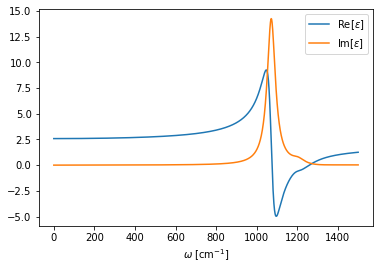

In [106]:
ws = np.linspace(0,1500,1500)
eps = AWA(SiO2.epsilon(ws),axes=[ws],axis_names=["$\omega$ [cm$^{-1}$]"])
eps.real.plot(label="Re[$\epsilon$]")
eps.imag.plot(label="Im[$\epsilon$]")
plt.legend();

## Anisotropic materials

In [58]:
# Grab the built-in instance of SiC4H from NearFieldOptics.Materials:
SiC_4H = M.SiC_4H

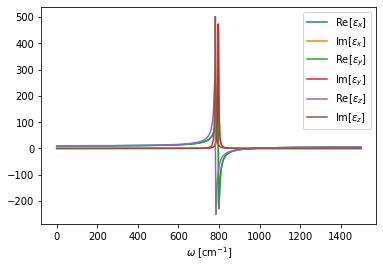

In [105]:
ws = np.linspace(0,1500,1500)
eps_x = AWA([eps[0,0] for eps in SiC_4H.epsilon_anisotropic(ws)],axes=[ws],axis_names=["$\omega$ [cm$^{-1}$]"])
eps_y = AWA([eps[1,1] for eps in SiC_4H.epsilon_anisotropic(ws)],axes=[ws],axis_names=["$\omega$ [cm$^{-1}$]"])
eps_z = AWA([eps[2,2] for eps in SiC_4H.epsilon_anisotropic(ws)],axes=[ws],axis_names=["$\omega$ [cm$^{-1}$]"])

eps_x.real.plot(label="Re[$\epsilon_x$]")
eps_x.imag.plot(label="Im[$\epsilon_x$]")
eps_y.real.plot(label="Re[$\epsilon_y$]")
eps_y.imag.plot(label="Im[$\epsilon_y$]")
eps_z.real.plot(label="Re[$\epsilon_z$]")
eps_z.imag.plot(label="Im[$\epsilon_z$]")

plt.legend();

## Graphene

In [9]:
# Instantiate an instance of single layer graphene with:
#    mu    = 2400 1/cm = 297.6 meV
#    gamma = 20 1/cm
Graphene = M.SingleLayerGraphene(chemical_potential=2400, gamma=20)

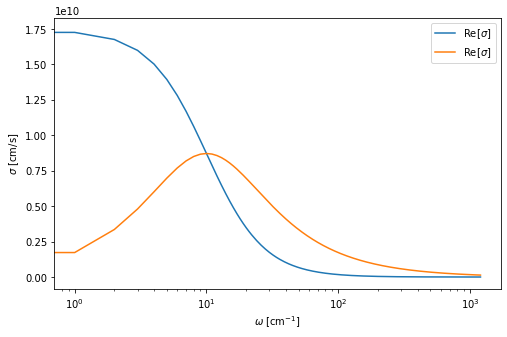

In [70]:
ws = np.linspace(0,1200,1200)
qs = np.linspace(1e3, 1e6, 100)
sigma = AWA(Graphene.conductivity(ws),axes=[ws],axis_names=["$\omega$ [cm$^{-1}$]"])

plt.figure(figsize=(8,5))
sigma.real.plot(label="Re[$\sigma$]")
sigma.imag.plot(label="Re[$\sigma$]")

plt.legend()
plt.ylabel("$\sigma$ [cm/s]");
plt.xscale("log")

### Effect of chemical potential

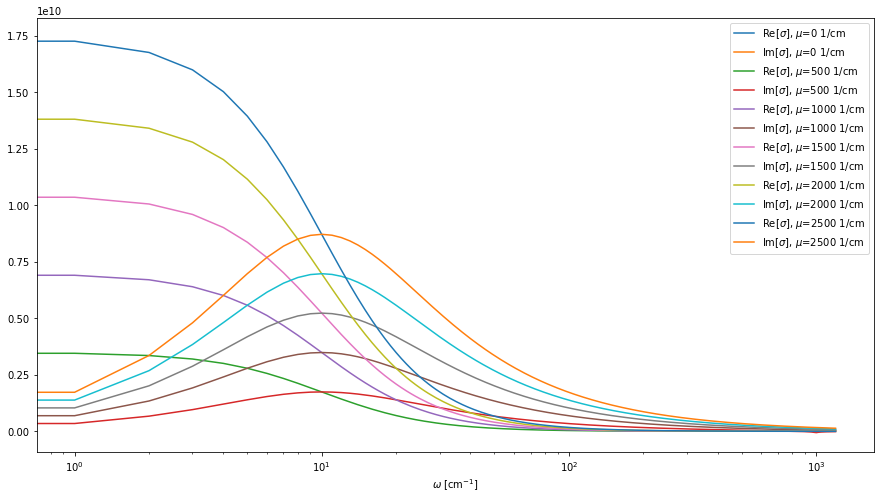

In [75]:
ws = np.linspace(0,1200,1200)
plt.figure(figsize=(15,8))
for mu in np.arange(0,3000,500):
    Graphene = M.SingleLayerGraphene(chemical_potential=mu, gamma=10)
    sigma = AWA(Graphene.conductivity(ws),axes=[ws],axis_names=["$\omega$ [cm$^{-1}$]"])
    sigma.real.plot(label="Re[$\sigma$], $\mu$={} 1/cm".format(mu))
    sigma.imag.plot(label="Im[$\sigma$], $\mu$={} 1/cm".format(mu))
plt.xscale("log")
plt.legend();

## hBN

In [86]:
# Grab the built-in instance of hBN from NearFieldOptics.Materials:
hBN = M.BN_Caldwell

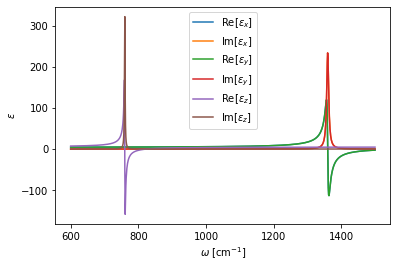

In [104]:
ws = np.linspace(600,1500,900)
eps = hBN.epsilon_anisotropic(ws)

eps_x = AWA([e[0,0] for e in eps], axes=[ws], axis_names=["$\omega$ [cm$^{-1}$]"])
eps_y = AWA([e[1,1] for e in eps], axes=[ws], axis_names=["$\omega$ [cm$^{-1}$]"])
eps_z = AWA([e[2,2] for e in eps], axes=[ws], axis_names=["$\omega$ [cm$^{-1}$]"])

eps_x.real.plot(label="Re[$\epsilon_x$]")
eps_x.imag.plot(label="Im[$\epsilon_x$]")
eps_y.real.plot(label="Re[$\epsilon_y$]")
eps_y.imag.plot(label="Im[$\epsilon_y$]")
eps_z.real.plot(label="Re[$\epsilon_z$]")
eps_z.imag.plot(label="Im[$\epsilon_z$]")

plt.ylabel("$\epsilon$")
plt.legend();

## Tabulated materials
If you have the optical constants for a material which is not included in the NearFieldOptics package, it is straightforward to create a Material instance of your custom material.

### Isotropic (example: WS$_2$)
Please see "NearFieldOptics/Materials/Tabulated/WS2.csv" for example of isotropic optical constant file.

In [97]:
WS2 = M.TabulatedMaterialFromFile("WS2.csv")

<NearFieldOptics.Materials.material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "WS2.csv"...


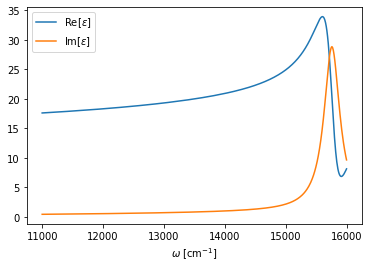

In [103]:
ws = np.linspace(11000,16000,5000)
eps = AWA(WS2.epsilon(ws),axes=[ws],axis_names=["$\omega$ [cm$^{-1}$]"])
eps.real.plot(label="Re[$\epsilon$]")
eps.imag.plot(label="Im[$\epsilon$]")
plt.legend();

### Anisotropic (example: BN)
Please see "NearFieldOptics/Materials/Tabulated/BN_anis.csv" for example of anisotropic optical constant file.

In [110]:
BN = M.TabulatedAnisotropicMaterialFromFile("BN_anis.csv")

<NearFieldOptics.Materials.material_types.TabulatedAnisotropicMaterialFromFile.__init__>:
	Loading tabulated material data from file "/home/meberko/Projects/NearFieldOptics/Materials/Tabulated/BN_anis.csv"...


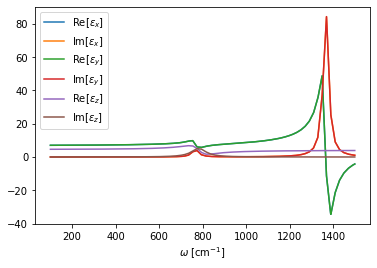

In [117]:
ws = np.linspace(100,1500,1400)
eps_x = AWA(BN.ordinary_epsilon(ws), axes=[ws], axis_names=["$\omega$ [cm$^{-1}$]"])
eps_y = AWA(BN.ordinary_epsilon(ws), axes=[ws], axis_names=["$\omega$ [cm$^{-1}$]"])
eps_z = AWA(BN.extraordinary_epsilon(ws), axes=[ws], axis_names=["$\omega$ [cm$^{-1}$]"])

eps_x.real.plot(label="Re[$\epsilon_x$]")
eps_x.imag.plot(label="Im[$\epsilon_x$]")
eps_y.real.plot(label="Re[$\epsilon_y$]")
eps_y.imag.plot(label="Im[$\epsilon_y$]")
eps_z.real.plot(label="Re[$\epsilon_z$]")
eps_z.imag.plot(label="Im[$\epsilon_z$]")

plt.legend();

# Layered structures
In this example, we will recreate the structure from Siyuan Dai's 2015 Nature paper "Graphene on hexagonal boron nitride as a tunable hyperbolic metamaterial" (https://www.nature.com/articles/nnano.2015.131).

As such, we will create a layered structure with:
    ---------- Graphene -----------
    ---------- 58 nm hBN ----------    
    --------- 300 nm SiO2 ---------
    ------------- Si --------------       

## Gather our materials

In [120]:
# Graphene with:
#    - Reasonable room temperature gamma = 20 1/cm
#    - Chemical potential = 370 meV = 2984.25 1/cm
Graphene = M.SingleLayerGraphene(chemical_potential=2984.25, gamma=20)
BN = M.BN_Caldwell
Si = M.Si
SiO2 = M.SiO2_300nm

## Create a LayeredMedia object

In [138]:
Layers = [
    Graphene,
    (BN,   58e-7),
    (SiO2, 300e-7)
]
Heterostructure = M.LayeredMediaTM(*Layers, exit = Si)

## Calculate $r_p(\omega,q)$

In [143]:
ws = np.linspace(600,1800,1200)
qs = np.linspace(1e4, 1e6, 500)
rp = Heterostructure.reflection_p(ws,qs).T

### Comparison to data

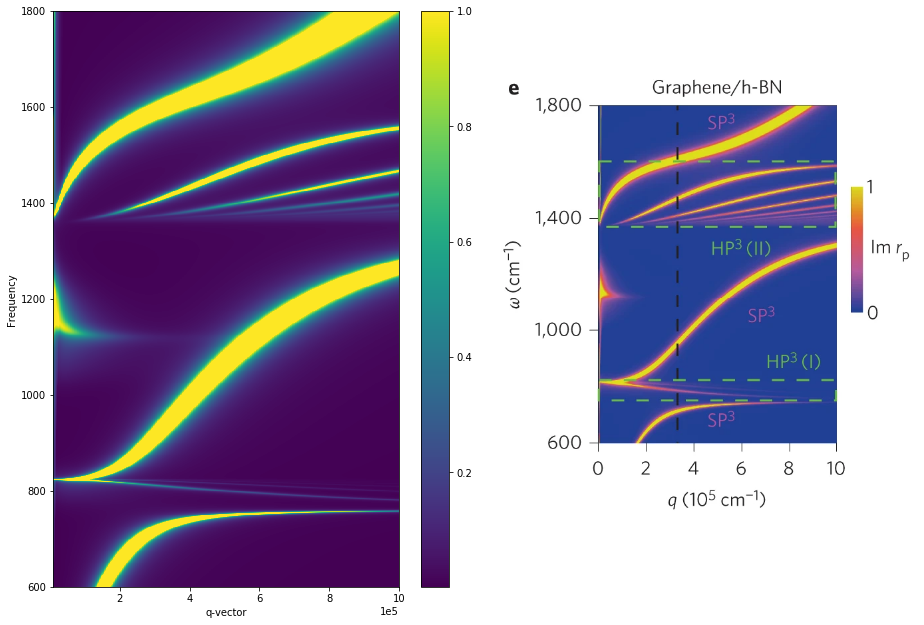

In [151]:
fig,ax = plt.subplots(figsize=(12,8),nrows=1,ncols=2)

plt.sca(ax[0])
rp.imag.plot(vmax=1)
plt.gca().ticklabel_format(axis="x", style="sci", scilimits=[5,5])

plt.sca(ax[1])
plt.imshow(mpimg.imread("./S_Dai_rp.png"))
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

## Calculate near-field signal

In [155]:
a=20           # Radius of tip apex for a near-field probe, in nanometers
q_a=1/a        # This defines the characteristic in-plane momentum for near-fields in SNOM
Nqs = 200      # Number of q values at which to evaluate
Nzs = 40       # Number of z values at which to evaluate
A = 80         # Oscillation amplitude in nanometers
norm_at = 1000 # Frequency at which to normalize signal
norm_to=M.Au   # Material to which model will normalize signal (in this case, gold)

ws = np.linspace(600,1800,400)

S = T.LightningRodModel(ws, \
                       rp=Heterostructure.reflection_p,    \
                       a=a, Nqs=Nqs, Nzs=Nzs, amplitude=A, \
                       normalize_to=norm_to.reflection_p,  \
                       normalize_at=norm_at)

<NearFieldOptics.TipModels._LightningRodModel_.__call__>:
	Getting signal...
<NearFieldOptics.TipModels._LightningRodModel_.get_signal>:
	Computing near-field signal with Lightning Rod Model...
<NearFieldOptics.TipModels._LightningRodModel_.prepare_model>:
	Preparing model...
<NearFieldOptics.TipModels._LightningRodModel_.load_charge_data>:
	Loading charge data from file "/home/meberko/Projects/NearFieldOptics/TipModels/ChargeData/HyperboloidCharge_L=6.33E+02_SkinDepth=5.00E-02_Taper=20_Quad=TS_Nzs=244_Nqs=244_freq=3.00E-03.pickle"...
	Using incident beam profile: "plane_wave"
	Incidence angle: 30 degrees
	Computing xWarp quadrature for q-values...
	PROGRESS: 0% - Computing state of the tip charge v. z & s at freq=600.0 cm^-1...
	PROGRESS: 0% - Computing state of the tip charge v. z & s at freq=603.0075187969925 cm^-1...
	PROGRESS: 0% - Computing state of the tip charge v. z & s at freq=606.015037593985 cm^-1...
	PROGRESS: 0% - Computing state of the tip charge v. z & s at freq=609.022

	PROGRESS: 20% - Computing state of the tip charge v. z & s at freq=840.6015037593985 cm^-1...
	PROGRESS: 20% - Computing state of the tip charge v. z & s at freq=843.609022556391 cm^-1...
	PROGRESS: 20% - Computing state of the tip charge v. z & s at freq=846.6165413533835 cm^-1...
	PROGRESS: 20% - Computing state of the tip charge v. z & s at freq=849.624060150376 cm^-1...
	PROGRESS: 21% - Computing state of the tip charge v. z & s at freq=852.6315789473684 cm^-1...
	PROGRESS: 21% - Computing state of the tip charge v. z & s at freq=855.6390977443609 cm^-1...
	PROGRESS: 21% - Computing state of the tip charge v. z & s at freq=858.6466165413533 cm^-1...
	PROGRESS: 21% - Computing state of the tip charge v. z & s at freq=861.6541353383459 cm^-1...
	PROGRESS: 22% - Computing state of the tip charge v. z & s at freq=864.6616541353383 cm^-1...
	PROGRESS: 22% - Computing state of the tip charge v. z & s at freq=867.6691729323309 cm^-1...
	PROGRESS: 22% - Computing state of the tip charge v

	PROGRESS: 42% - Computing state of the tip charge v. z & s at freq=1105.2631578947369 cm^-1...
	PROGRESS: 42% - Computing state of the tip charge v. z & s at freq=1108.2706766917292 cm^-1...
	PROGRESS: 42% - Computing state of the tip charge v. z & s at freq=1111.2781954887218 cm^-1...
	PROGRESS: 42% - Computing state of the tip charge v. z & s at freq=1114.2857142857142 cm^-1...
	PROGRESS: 43% - Computing state of the tip charge v. z & s at freq=1117.2932330827066 cm^-1...
	PROGRESS: 43% - Computing state of the tip charge v. z & s at freq=1120.3007518796992 cm^-1...
	PROGRESS: 43% - Computing state of the tip charge v. z & s at freq=1123.3082706766918 cm^-1...
	PROGRESS: 43% - Computing state of the tip charge v. z & s at freq=1126.3157894736842 cm^-1...
	PROGRESS: 44% - Computing state of the tip charge v. z & s at freq=1129.3233082706765 cm^-1...
	PROGRESS: 44% - Computing state of the tip charge v. z & s at freq=1132.3308270676691 cm^-1...
	PROGRESS: 44% - Computing state of the 

	PROGRESS: 63% - Computing state of the tip charge v. z & s at freq=1363.9097744360902 cm^-1...
	PROGRESS: 63% - Computing state of the tip charge v. z & s at freq=1366.9172932330825 cm^-1...
	PROGRESS: 64% - Computing state of the tip charge v. z & s at freq=1369.9248120300751 cm^-1...
	PROGRESS: 64% - Computing state of the tip charge v. z & s at freq=1372.9323308270677 cm^-1...
	PROGRESS: 64% - Computing state of the tip charge v. z & s at freq=1375.9398496240601 cm^-1...
	PROGRESS: 64% - Computing state of the tip charge v. z & s at freq=1378.9473684210525 cm^-1...
	PROGRESS: 65% - Computing state of the tip charge v. z & s at freq=1381.954887218045 cm^-1...
	PROGRESS: 65% - Computing state of the tip charge v. z & s at freq=1384.9624060150377 cm^-1...
	PROGRESS: 65% - Computing state of the tip charge v. z & s at freq=1387.96992481203 cm^-1...
	PROGRESS: 65% - Computing state of the tip charge v. z & s at freq=1390.9774436090224 cm^-1...
	PROGRESS: 66% - Computing state of the tip

	PROGRESS: 85% - Computing state of the tip charge v. z & s at freq=1622.5563909774437 cm^-1...
	PROGRESS: 85% - Computing state of the tip charge v. z & s at freq=1625.563909774436 cm^-1...
	PROGRESS: 85% - Computing state of the tip charge v. z & s at freq=1628.5714285714284 cm^-1...
	PROGRESS: 85% - Computing state of the tip charge v. z & s at freq=1631.578947368421 cm^-1...
	PROGRESS: 86% - Computing state of the tip charge v. z & s at freq=1634.5864661654134 cm^-1...
	PROGRESS: 86% - Computing state of the tip charge v. z & s at freq=1637.593984962406 cm^-1...
	PROGRESS: 86% - Computing state of the tip charge v. z & s at freq=1640.6015037593984 cm^-1...
	PROGRESS: 86% - Computing state of the tip charge v. z & s at freq=1643.609022556391 cm^-1...
	PROGRESS: 87% - Computing state of the tip charge v. z & s at freq=1646.6165413533834 cm^-1...
	PROGRESS: 87% - Computing state of the tip charge v. z & s at freq=1649.624060150376 cm^-1...
	PROGRESS: 87% - Computing state of the tip c

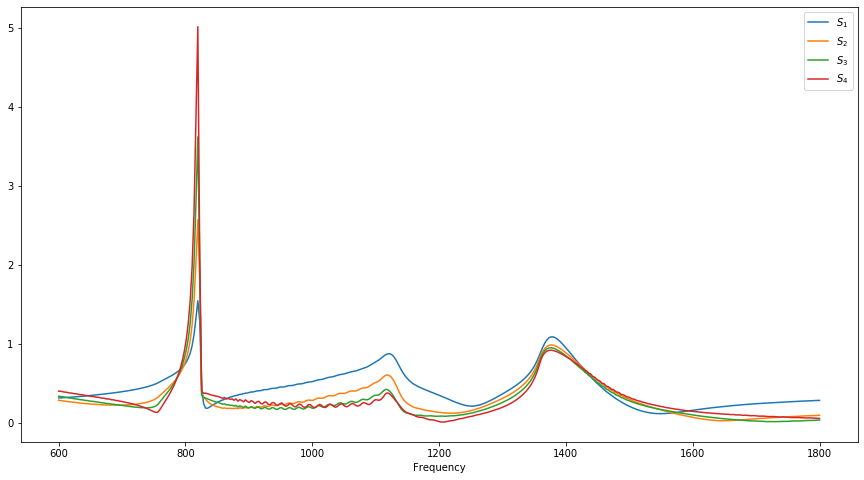

In [159]:
plt.figure(figsize=(15,8))
np.abs(S["signal_1"]).plot(label="$S_1$")
np.abs(S["signal_2"]).plot(label="$S_2$")
np.abs(S["signal_3"]).plot(label="$S_3$")
np.abs(S["signal_4"]).plot(label="$S_4$")
plt.legend();